**Importing Libraries :** 

In [39]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


**Acquiring The Data :**

In [6]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print("Data imported successfully")
df.head(7)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


**Visualizing the data :**

Text(0, 0.5, 'SCORES(%)')

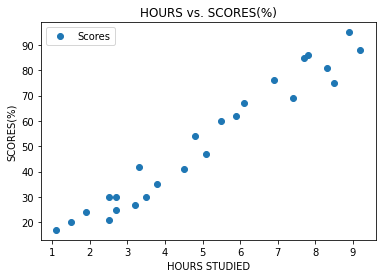

In [18]:
df.plot(x='Hours',y='Scores',style = 'o')
plt.title('HOURS vs. SCORES(%)')
plt.xlabel('HOURS STUDIED')
plt.ylabel('SCORES(%)')


**Preparing The Data :**

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

**Train-test split of the data :**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

**Training the model :**

In [13]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting the Regression line on the test data :**

Text(0, 0.5, 'Percentage Score')

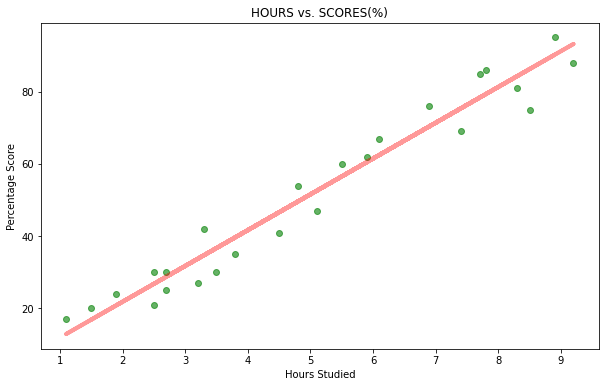

In [21]:
line = reg.coef_*X + reg.intercept_

plt.figure(figsize=(10,6))
plt.scatter(X,y,color = 'green',alpha=0.6)
plt.plot(X,line,color='red',linewidth=4,alpha=0.4)
plt.title('HOURS vs. SCORES(%)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')


**Predictions :**

In [22]:
#test data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
y_pred = reg.predict(X_test)

#comparison between actual and predicted values
cdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
cdf 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
#testing for 9.25 hrs/day
hours = [[9.25]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


**Evaluating the model :**


1.   Mean Absolute Error
2.   R2-score



In [37]:
#Mean Absolute Error

print('Mean Absolute Error = ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error =  4.183859899002982


In [38]:
#R2-score

print('R2-score = ',metrics.r2_score(y_test,y_pred))

R2-score =  0.9454906892105354
